In [1]:
import sys
sys.path.append('/home/jovyan/work/__dag_config__/python3/lib/python3.9/site-packages')

Imports

In [2]:
import numpy as np
from utils.dawnplot import *
from utils.dawnfrb import FRBInfo

catalog = FRBInfo(
    '/home/jovyan/work/chime_data/21.0007/',
    '/home/jovyan/work/chime_data/23.0004/',
    remove_duplicates=True
)

/opt/conda/envs/umap/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/conda/envs/umap/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/conda/envs/umap/lib/python3.9/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: Th

Get Data

In [3]:
timeSeries = catalog['ts']
modelTimeSeries = catalog['model_ts']

In [60]:
plot = BokehInterface(
    views=[
        EmbeddingView(
            title='model_ts_fft',
            data=modelTimeSeries,
            reducer=FFT_UMAP(
                norm_inputs=True,
                n_neighbors=15,
                min_dist=0.1,
                metric='euclidean',
                verbose=True,
            ),
        ),
        EmbeddingView(
            title='ts_fft',
            data=timeSeries,
            reducer=FFT_UMAP(
                norm_inputs=True,
                n_neighbors=15,
                min_dist=0.1,
                metric='euclidean',
                verbose=True,
            ),
        ),
    ],
    plot_elements=[
        ColorTooltipData(
            title='width_ms',
            data=[i*1000 for i in catalog['width_fitb']],
        ),
        ColorMap(
            title='scattering_ms',
            data=[i*1000 for i in catalog['scat_time']],
        ),
        ColorMap(
            title='scatterfit',
            data=["✔️" if i else "❌" for i in catalog['scatterfit']],
            high_transparent=False,
        ),
        ColorMap(
            title='known_repeater',
            data=["✔️" if rp != -9999.0 else "❌" for rp in catalog['repeater_name']],
            high_transparent=False,
        ),
        ColorMap(
            title='ts_embedding_label',
            data=[str(l) for l in catalog['ts_embedding_label']],
        ),
        TooltipData(
            title='tns_name',
            data=catalog['tns_name'],
        ),
        TooltipGraph(
            TimeSeriesFFTProcessor().transform(modelTimeSeries),
            TimeSeriesFFTProcessor().transform(timeSeries),
            title='modelTimeSeriesFFT',
        ),
    ],
)

UMAP(n_jobs=4, verbose=True)
Mon Aug 14 16:11:57 2023 Construct fuzzy simplicial set
Mon Aug 14 16:11:57 2023 Finding Nearest Neighbors
Mon Aug 14 16:11:57 2023 Finished Nearest Neighbor Search
Mon Aug 14 16:11:57 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Mon Aug 14 16:12:00 2023 Finished embedding
UMAP(n_jobs=4, verbose=True)
Mon Aug 14 16:12:00 2023 Construct fuzzy simplicial set
Mon Aug 14 16:12:01 2023 Finding Nearest Neighbors
Mon Aug 14 16:12:01 2023 Finished Nearest Neighbor Search
Mon Aug 14 16:12:01 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Mon Aug 14 16:12:04 2023 Finished embedding


In [42]:
plot.PLOT_DF['marker'] = ['star' if rp != -9999.0 else 'circle' for rp in catalog['repeater_name']]
plot.PLOT_DF['size'] = [20 if rp != -9999.0 else 6 for rp in catalog['repeater_name']]
plot.init_plot_elements()
plot.plotPoints.glyph.size='size'
plot.plotPoints.glyph.marker = 'marker'
# plot.plotPoints.glyph.line_alpha=1
plot.plotPoints.glyph.line_color='black'
# plot.plotPoints.glyph.fill_alpha=1
# plot.plotPoints.glyph.line_width='outline'
plot.show()

Loading BokehJS ...

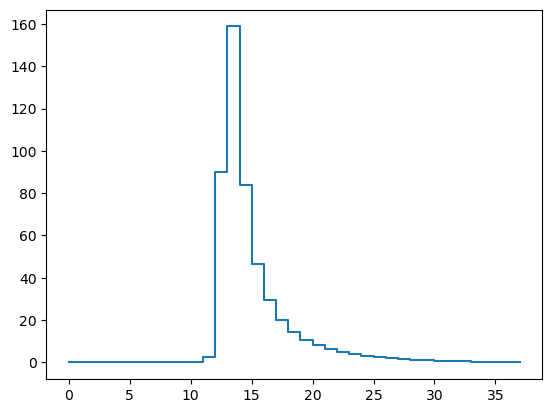

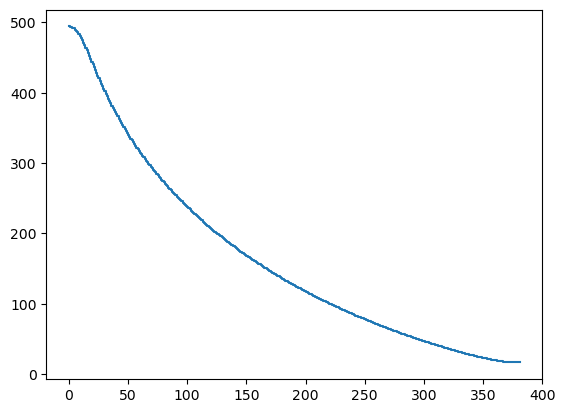

In [61]:
import matplotlib.pyplot as plt
plt.plot(modelTimeSeries[4],drawstyle='steps-post')
plt.show()
plt.plot(TimeSeriesFFTProcessor(norm_inputs=False).transform(modelTimeSeries)[4],drawstyle='steps-post')